# Week4-机器学习-线性回归
- sklearn 中文社区： https://scikit-learn.org.cn/
- sklearn.linear_model.LinearRegression：https://scikit-learn.org.cn/view/394.html
- 英文官网：https://scikit-learn.org/stable/

## 1. 单变量线性回归

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

### （1）数据加载

In [4]:
# ./data/regress_data1.csv

data = pd.read_csv('./data/regress_data1.csv')
print(data.head())
print(data.info())

       人口       收益
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   人口      97 non-null     float64
 1   收益      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None


### 看下数据长什么样子

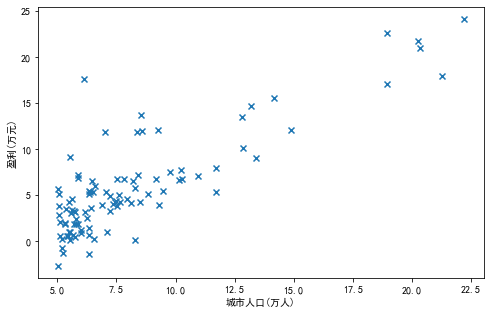

In [5]:
# 二维数据，散点图
x = data['人口']
y = data['收益']
plt.figure(figsize=(8,5))
plt.scatter(x, y, marker='x')
plt.xlabel('城市人口(万人)')
plt.ylabel('盈利(万元)')
plt.show()

### （2）特征和目标拆分

In [9]:
# 拆分特征和标记，特征矩阵常用x表示， 标记用y
# x = data.iloc[::-1] # 人口
x = data['人口'].values.reshape(-1, 1)
y = data['收益'] # 收益

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 收益, Length: 97, dtype: float64

In [6]:
# 最后，处理完数据，再确认一遍数据的维度

x.shape, y.shape

((97, 1), (97,))

### （3）构建线性回归模型
[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- 下面是一组用于回归的方法， 其中目标值是特征的线性组合。在数学表示法中，如果 $\hat{y}$ 表示预测值,那么有：
$\hat{y}(w, x)=w_{0}+w_{1} x_{1}+\ldots+w_{p} x_{p}$

- 在整个模型中，我们定义向量 w1,w2... 作为coef_,定义 w0 作为intercept_

In [18]:
from sklearn.linear_model import LinearRegression  # 线性回归

# 1.初始化模型

lr = LinearRegression() # 不写参数 用默认

# 2.训练
lr.fit(x, y)


# 3.输出训练参数组合
print("训练之后得到的参数组合为: a = ", lr.coef_, 'b = ', lr.intercept_) # coef_: x 前面的系数   intercept_: 常数项, 偏置项
# y = -3.89 + 1.19*x

训练之后得到的参数组合为: a =  [1.19303364] b =  -3.89578087831185


### （4）模型评价
- 回归指标：https://scikit-learn.org.cn/view/93.html#3.3.4%20%E5%9B%9E%E5%BD%92%E6%8C%87%E6%A0%87

#### 线性模型一般用两个评价指标：均方误差MSE，决定系数R2-Score

**均方误差MSE**  
- 样本的误差的平方和的均值。https://scikit-learn.org.cn/view/513.html
$$
MSE(y, \hat{y})=\frac{1}{n} \sum_{i=0}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

**决定系数R2**  https://scikit-learn.org.cn/view/519.html
- 决定系数（coefficient ofdetermination），也叫R2判定系数或拟合优度。
- R2反应了**因变量y的波动有多少百分比能被自变量x的波动所描述，所以R2的值在0-1之间，越接近1越好**
- 意义：R2值越大，说明x对y的解释程度越高。也说明观察点在回归直线附近越密集。

In [19]:
# 加载评价指标函数
from sklearn.metrics import mean_squared_error #MSE均方差错误
from sklearn.metrics import r2_score # R2系数

# 4. 模型预测
y_pred = lr.predict(x)

# 5. 模型评估 mean_Squared_error(真实值, 预测值)
print("在数据集上的均方误差MSE为：", mean_squared_error(y, y_pred))
print("在数据集上的决定系数r2得分为：", r2_score(y, y_pred))

在数据集上的均方误差MSE为： 8.953942751950358
在数据集上的决定系数r2得分为： 0.7020315537841397


### （5）可视化

- 现在我们来绘制线性模型 y=ax+b 这条直线，以及原始数据，直观地看出它的拟合。

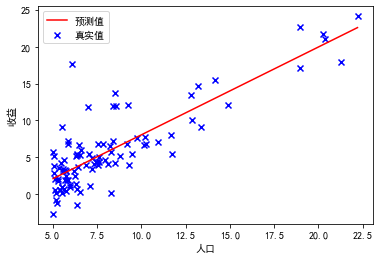

In [20]:
plt_x = np.linspace(x.min(), x.max(), 100)# 横轴选取100个点
plt_y = lr.intercept_ + lr.coef_ * plt_x # y = -3.89 + 1.19*x 预测的表达式

plt.plot(plt_x, plt_y, color='r', label='预测值')

plt.scatter(data['人口'], data['收益'], marker='x', color='b', label='真实值')
plt.xlabel("人口")
plt.ylabel("收益")
plt.legend()

## 2. 多变量线性回归

### [Boston 房价回归数据集](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset)

- 数据集来自卡内基梅隆大学维护的 StatLib 库。
- 样本包含 1970 年代的在波士顿郊区不同位置的房屋信息，总共有 13 种房屋属性。 目标值是**一个位置的房屋的中值（单位：k$）**。
- 这十三个特征包括：
    1. 人均犯罪率
    1. 在25000平方英尺上住房的比例
    1. 每个镇上平均的非零售企业比例
    1. 是否沿河（查尔斯河）1/0
    1. 一氧化氮的浓度，单位是千万分之一
    1. 每个住所的平均房间数
    1. 1940年以前自己修的建筑比例
    1. 波士顿五个就业中心的加权距离
    1. 径向公路适应性指标
    1. 每10000的税率的完全价值
    1. 镇上的学生-老师比例
    1. 其中Bk是比例
    1. 低地位人口比例
- 而标签则是有房子人的房价的中位数。

y = ax + b -->  y = w1x1 + w2x2 + ... + w13x13 + b

### （1）数据加载

In [7]:
from sklearn.datasets import load_boston

# 导入波士顿房价数据集
dataset = load_boston()

In [3]:
X = dataset.data # 导入所有特征变量
y = dataset.target # 导入目标值（房价）
names = dataset.feature_names # 导入特征名
# 查看数据维度
X.shape, y.shape

((506, 13), (506,))

In [23]:
# 查看前3个样本的特征
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [24]:
# 查看前3个样本的标签
y[:3]

array([24. , 21.6, 34.7])

In [25]:
# 查看列名
names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
# 查看房价最大最小值
y.max(), y.min()

(50.0, 5.0)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

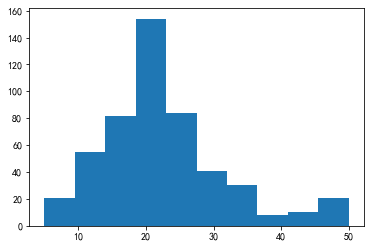

In [27]:
# 查看房价的直方图，房价分布
plt.hist(y)

### （2）数据拆分
- 数据需要被分割为训练集和测试集：

In [49]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, # 需要拆分的数据
                                                    test_size=0.2,
                                                    random_state=666 # 随机种子  保证每次数目一致
                                                    )
#随机20%的数据构建测试样本，剩余作为训练样本
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### （3）数据标准化

- StandardScaler标准化方法，针对**每一个特征维度**来做的，而不是针对样本。 
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- 使得经过处理的数据符合标准正态分布，即均值为0，标准差为1，其转化函数为： **x_std = (x-μ)/σ**
- 其中μ为所有样本数据的均值，σ为所有样本数据的标准差。
- **用于测试集的标准化的均值μ和标准差σ应该都来源于训练集，即在train上面fit，然后transform到test上**

In [50]:
X_train[:5].round(0) # round(0) 只显示整数部分

array([[  0.,  52.,   5.,   0.,   0.,   6.,  31.,   7.,   6., 293.,  17.,
        397.,   7.],
       [  4.,   0.,  18.,   0.,   1.,   6.,  85.,   3.,  24., 666.,  20.,
         22.,  17.],
       [  1.,   0.,   8.,   0.,   1.,   6.,  82.,   4.,   4., 307.,  21.,
        387.,  15.],
       [  0.,   0.,   2.,   0.,   0.,   6.,  90.,   3.,   3., 193.,  18.,
        391.,  14.],
       [  1.,   0.,   8.,   0.,   1.,   5.,  37.,   4.,   4., 307.,  21.,
        289.,  12.]])

In [51]:
# 特征数据标准化 用均值-标准差标准化
from sklearn.preprocessing import StandardScaler  # z-score标准化

sc = StandardScaler() # 初始化
sc.fit(X_train) # 训练 求解X_train的均值和标准差
X_train_std = sc.transform(X_train) # transform 数据转换
X_test_std = sc.transform(X_test)

# 看下转换后的数据类型和维度
X_train_std[:10].round(1)

array([[-0.4,  1.8, -0.9, -0.3, -1.3, -0.1, -1.3,  1.7, -0.4, -0.7, -0.9,
         0.4, -0.8],
       [ 0. , -0.5,  1. , -0.3,  0.9, -0.5,  0.6, -0.4,  1.7,  1.5,  0.8,
        -3.5,  0.6],
       [-0.3, -0.5, -0.4, -0.3, -0.1, -0.4,  0.5,  0.2, -0.6, -0.6,  1.2,
         0.3,  0.3],
       [-0.4, -0.5, -1.3, -0.3, -0.6, -1. ,  0.8, -0.4, -0.8, -1.3, -0.3,
         0.4,  0.2],
       [-0.3, -0.5, -0.4, -0.3, -0.1, -1.2, -1.1,  0. , -0.6, -0.6,  1.2,
        -0.7, -0.1],
       [-0.4, -0.5,  0.4,  3.4, -0. , -0.5,  0.9, -0.4, -0.5, -0.8, -1. ,
         0.4,  0.7],
       [-0.4, -0.5, -0.6, -0.3, -0.9, -0.3, -1. ,  0.9, -0.8, -1. , -0.3,
         0.4, -0.4],
       [-0.4, -0.5, -0.2, -0.3, -0.1, -0.4,  0.8, -0.5, -0.6, -0.6, -0. ,
         0.4, -0.1],
       [-0.4, -0.5, -1.2, -0.3, -0.9,  2.5,  0.3, -0.1, -0.9, -0.8, -0.2,
         0.4, -1.2],
       [ 1.3, -0.5,  1. , -0.3,  0.5, -0.1,  0.7, -0.9,  1.7,  1.5,  0.8,
         0.3,  0. ]])

In [52]:
print("在进行数据的标准化后：\ntrain数据预览：(前三条）------------")
print(X_train_std[:3].round(1))
print("train的最大值是：\n", np.max(X_train_std, axis=0).round(1))
print("train的最小值是：\n", np.min(X_train_std, axis=0).round(1))
print("train的平均值是：\n", np.mean(X_train_std, axis=0).round(1))
print("train的标准差是：\n", np.std(X_train_std, axis=0).round(1))

在进行数据的标准化后：
train数据预览：(前三条）------------
[[-0.4  1.8 -0.9 -0.3 -1.3 -0.1 -1.3  1.7 -0.4 -0.7 -0.9  0.4 -0.8]
 [ 0.  -0.5  1.  -0.3  0.9 -0.5  0.6 -0.4  1.7  1.5  0.8 -3.5  0.6]
 [-0.3 -0.5 -0.4 -0.3 -0.1 -0.4  0.5  0.2 -0.6 -0.6  1.2  0.3  0.3]]
train的最大值是：
 [10.   3.8  2.5  3.4  2.7  3.5  1.1  4.   1.7  1.8  1.6  0.4  3.5]
train的最小值是：
 [-0.4 -0.5 -1.6 -0.3 -1.5 -3.4 -2.3 -1.3 -1.  -1.3 -2.7 -3.7 -1.5]
train的平均值是：
 [-0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.]
train的标准差是：
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [53]:
print("在进行数据的标准化后：\ntest数据预览：(前三条）------------")
print(X_test_std[:3].round(1))
print("test的最大值是：\n", np.max(X_test_std, axis=0).round(1))
print("test的最小值是：\n", np.min(X_test_std, axis=0).round(1))
print("test的平均值是：\n", np.mean(X_test_std, axis=0).round(1))
print("test的标准差是：\n", np.std(X_test_std, axis=0).round(1))

在进行数据的标准化后：
test数据预览：(前三条）------------
[[-0.4  0.6 -0.9 -0.3 -1.1  0.5  0.1  0.8 -0.6 -0.8  0.2  0.4 -0.8]
 [ 0.6 -0.5  1.  -0.3  1.4  1.5  1.1 -0.6  1.7  1.5  0.8  0.2  0.6]
 [-0.3 -0.5 -0.2 -0.3 -0.1 -0.2 -0.6 -0.5 -0.6 -0.6 -0.   0.4 -0.9]]
test的最大值是：
 [7.6 3.6 2.5 3.4 2.7 2.1 1.1 2.6 1.7 1.8 1.3 0.4 3. ]
test的最小值是：
 [-0.4 -0.5 -1.5 -0.3 -1.3 -3.8 -2.2 -1.3 -1.  -1.3 -2.7 -3.5 -1.3]
test的平均值是：
 [ 0.   0.1  0.  -0.2  0.  -0.   0.   0.  -0.   0.  -0.   0.1 -0.1]
test的标准差是：
 [1.  1.  1.1 0.5 1.  0.9 1.  1.  1.  1.  1.  0.8 0.9]


In [54]:
# 最后，处理完数据，再确认一遍数据的维度
X_train_std.shape, y_train.shape, X_test_std.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

### （4）建模

In [55]:
# 线性回归
from sklearn.linear_model import LinearRegression
# 使用默认参数值实例化线性回归器LinearRegression
lr2 = LinearRegression()

# 使用训练数据进行训练
lr2.fit(X_train_std, y_train)

# 输出训练最优组合
# w: 越大, 特征性越高. 正负性: 正相关, 负相关
print("在训练集训练得到参数组合为：\n其中w:\n{}\nb：\n{}".format(lr2.coef_, lr2.intercept_))

在训练集训练得到参数组合为：
其中w:
[-0.64506058  1.15282478  0.46432536  0.70079714 -1.85015923  2.92317098
  0.18459894 -2.95114444  2.54762504 -2.38114651 -2.08872447  1.11248715
 -3.84931724]
b：
22.621039603960384


### （5）模型评价

In [56]:
y_train_pred = lr2.predict(X_train_std) # 评价训练集


print("在训练集上的决定系数r2得分为：", r2_score(y_train, y_train_pred))
print("在训练集上的均方误差MSE为：", mean_squared_error(y_train, y_train_pred))

在训练集上的决定系数r2得分为： 0.7608053462687876
在训练集上的均方误差MSE为： 20.797425209362174


In [57]:
# 评价测试集
y_test_pred = lr2.predict(X_test_std)


print("在训练集上的决定系数r2得分为：", r2_score(y_test, y_test_pred))
print("在训练集上的均方误差MSE为：", mean_squared_error(y_test, y_test_pred))

在训练集上的决定系数r2得分为： 0.6336069713055623
在训练集上的均方误差MSE为： 27.20583783570151


In [58]:
# 看看预测的测试集输出和实际的差别
print('真实的测试数据的标签值（前20个）：', y_test[:20].round(1))
print('预测的测试数据的标签值（前20个）：', y_train[:20].round(1))

真实的测试数据的标签值（前20个）： [23.9 17.8 22.1 37.3 25.  19.7 16.2 18.9 29.6 18.4  8.4 24.7 19.8 15.4
 22.2 23.3 26.6 15.6 12.6 28.4]
预测的测试数据的标签值（前20个）： [23.2 19.  17.5 26.4 20.2 21.5 21.2 19.4 38.7 21.4 23.1 10.9 20.1 29.6
 13.6 11.5 33.4 16.  24.3 23.2]


### （6）模型保存与加载
- 更新sklearn时会依赖安装, 如果报错可手动安装：pip install joblib

In [59]:
import joblib # 保存加载模型

# 保存模型：dump
joblib.dump(lr2, 'boston_linear_reg.pkl')
# 导出
print('保存成功')

# 加载模型：load 
# 导入
reload_lr = joblib.load('boston_linear_reg.pkl')
reload_lr

保存成功


LinearRegression()

In [60]:
# 使用加载的模型预测
print('真实的测试数据的标签值（前20个）：', y_test[:20].round(1))
print('预测的测试数据的标签值（前20个）：', reload_lr.predict(X_test_std)[:20].round(1))

真实的测试数据的标签值（前20个）： [23.9 17.8 22.1 37.3 25.  19.7 16.2 18.9 29.6 18.4  8.4 24.7 19.8 15.4
 22.2 23.3 26.6 15.6 12.6 28.4]
预测的测试数据的标签值（前20个）： [27.1 23.  27.  34.7 22.9 21.3 15.7 23.7 24.9 18.9  4.2 24.9 21.  18.4
 24.2 26.8 27.8 13.5 18.5 28.4]
